This is for the capstone project of IBM's Data Science Certificate.

In [1]:
import pandas as pd
import numpy as np
import urllib.request
import folium

In [2]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library


In [4]:
from bs4 import BeautifulSoup

In [5]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = urllib.request.urlopen(url)
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
all_tables=soup.find_all("table")
right_table=soup.find('table', class_='wikitable sortable')
A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(str(cells[0].find(text=True))[:-1])
        B.append(str(cells[1].find(text=True))[:-1])
        C.append(str(cells[2].find(text=True))[:-1])
df=pd.DataFrame(A,columns=['Postal Code'])
df['Borough']=B
df['Neighborhood']=C
newdf = pd.read_csv('http://cocl.us/Geospatial_data')
merged_inner = pd.merge(left=newdf, right=df, left_on='Postal Code', right_on='Postal Code')

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [6]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [7]:
toronto_data = merged_inner[merged_inner['Borough'].str.contains('.*Toronto.*')].reset_index(drop=True)

In [32]:
toronto_data.shape

(39, 5)

In [9]:
CLIENT_ID = 'ZMYHISB3NDZ2LESX1V22ANP1X4YTTA1DHQ3AQ0TODFIPAVXO' # your Foursquare ID
CLIENT_SECRET = '2SB52NEYFIAMJPDFLJV0E3D0DMHXXWZY52EHD004FPH1IXIB' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 60

In [10]:
search_query = 'Chinese'
radius = 2000

In [19]:
import requests # library to handle requests
latitude = toronto_data.iloc[0]["Latitude"]
longitude = toronto_data.iloc[0]["Longitude"]
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']

In [22]:
from pandas.io.json import json_normalize

In [23]:
dataframe = json_normalize(venues)

In [24]:
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4ee2a7bc9adf3982fdbe2836,NaN,CA,NaN,Canada,NaN,645,[Canada],"[{'label': 'display', 'lat': 43.68055259152583...",43.680553,-79.287503,NaN,NaN,Fuxing Garden Chinese Food,v-1591934033
1,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,53449e26498e6ea4fd0c867b,2028 Queen St East,CA,Toronto,Canada,NaN,819,"[2028 Queen St East, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.6702, 'lng': -...",43.670200,-79.298618,NaN,ON,honey bee chinese food,v-1591934033
2,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,523e2174498e5496ed8739a7,955 Kingston Road,CA,Toronto,Canada,NaN,856,"[955 Kingston Road, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.68212, 'lng': ...",43.682120,-79.285980,NaN,ON,Kingston Chinese Restaurant,v-1591934033
3,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4c368bf12c8020a1a19d8700,2626 danforth ave,CA,Toronto,Canada,NaN,1454,"[2626 danforth ave, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.68852570708679...",43.688526,-79.299600,NaN,ON,Su Good Chinese,v-1591934033
4,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4d39da7d979ea143c9108afc,3026 Danforth Avenue,CA,East York,Canada,Thyra Avenue,1635,"[3026 Danforth Avenue (Thyra Avenue), East Yor...","[{'label': 'display', 'lat': 43.69089695776476...",43.690897,-79.290089,M4C 1N2,ON,Wing Wings chinese food restaurant,v-1591934033


In [26]:
latitude = toronto_data.iloc[1]["Latitude"]
longitude = toronto_data.iloc[1]["Longitude"]
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
dataframe1 = json_normalize(venues)
product = pd.concat([dataframe,dataframe1])
product 

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4ee2a7bc9adf3982fdbe2836,NaN,CA,NaN,Canada,NaN,645,[Canada],"[{'label': 'display', 'lat': 43.68055259152583...",43.680553,-79.287503,NaN,NaN,Fuxing Garden Chinese Food,v-1591934033
1,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,53449e26498e6ea4fd0c867b,2028 Queen St East,CA,Toronto,Canada,NaN,819,"[2028 Queen St East, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.6702, 'lng': -...",43.670200,-79.298618,NaN,ON,honey bee chinese food,v-1591934033
2,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,523e2174498e5496ed8739a7,955 Kingston Road,CA,Toronto,Canada,NaN,856,"[955 Kingston Road, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.68212, 'lng': ...",43.682120,-79.285980,NaN,ON,Kingston Chinese Restaurant,v-1591934033
3,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4c368bf12c8020a1a19d8700,2626 danforth ave,CA,Toronto,Canada,NaN,1454,"[2626 danforth ave, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.68852570708679...",43.688526,-79.299600,NaN,ON,Su Good Chinese,v-1591934033
4,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4d39da7d979ea143c9108afc,3026 Danforth Avenue,CA,East York,Canada,Thyra Avenue,1635,"[3026 Danforth Avenue (Thyra Avenue), East Yor...","[{'label': 'display', 'lat': 43.69089695776476...",43.690897,-79.290089,M4C 1N2,ON,Wing Wings chinese food restaurant,v-1591934033
0,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,58ab6f3eea29b818ab66cb3e,349 Broadview Ave,CA,Toronto,Canada,Gerrard St E,1613,"[349 Broadview Ave (Gerrard St E), Toronto ON ...","[{'label': 'display', 'lat': 43.665067, 'lng':...",43.665067,-79.352298,M4M 2H1,ON,Wok & Roast Chinese BBQ,v-1591934231
1,"[{'id': '52e81612bcbc57f1066b7a3c', 'name': 'A...",False,4db884b4f7b1b4c54f3e6570,NaN,CA,Toronto,Canada,NaN,219,"[Toronto ON, Canada]","[{'label': 'display', 'lat': 43.6775964513453,...",43.677596,-79.351861,NaN,ON,Best Of Chinese Medicine,v-1591934231
2,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",False,50b949bee4b080f3ffb2eab1,NaN,CA,NaN,Canada,NaN,446,[Canada],"[{'label': 'display', 'lat': 43.67757, 'lng': ...",43.677570,-79.357010,NaN,NaN,The Best Of Chinese Medicine,v-1591934231
3,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,4d72d530ec075481ab7c8fbf,897 Pape Ave,CA,Toronto,Canada,at Sammon Ave,702,"[897 Pape Ave (at Sammon Ave), Toronto ON M4K ...","[{'label': 'display', 'lat': 43.684585940432, ...",43.684586,-79.346910,M4K 3T9,ON,Number One Chinese Restaurant,v-1591934231
4,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",False,4e502487e4cdc76dc9bbd27b,NaN,CA,NaN,Canada,NaN,828,[Canada],"[{'label': 'display', 'lat': 43.686277, 'lng':...",43.686277,-79.347757,NaN,NaN,red rose chinese food,v-1591934231


In [ ]:
final = []

In [33]:

for term in range(2,39):
    latitude = toronto_data.iloc[term]["Latitude"]
    longitude = toronto_data.iloc[term]["Longitude"]
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    dataframe1 = json_normalize(venues)
    product = pd.concat([product,dataframe1],sort=True)
    

In [34]:
product.shape

(2837, 19)

In [38]:
newproduct = product[["location.lat","location.lng"]]

In [39]:
newproduct.head()

,location.lat,location.lng
0,43.680553,-79.287503
1,43.670200,-79.298618
2,43.682120,-79.285980
3,43.688526,-79.299600
4,43.690897,-79.290089


In [47]:
newproduct.shape

(2837, 2)

In [40]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs


In [48]:
newproduct.loc[newproduct['location.lng'].idxmax()]

,location.lat,location.lng
2,43.682120,-79.285980
2,43.677570,-79.357010
2,43.682414,-79.328845
2,43.665467,-79.351200
2,43.671141,-79.390827
2,43.670450,-79.392822
2,43.677570,-79.357010
2,43.666156,-79.374612
2,43.653185,-79.396677
2,43.665467,-79.351200


[[ 43.65529543 -79.39338268]
 [ 43.67282892 -79.34420885]
 [ 43.66166507 -79.45076898]]


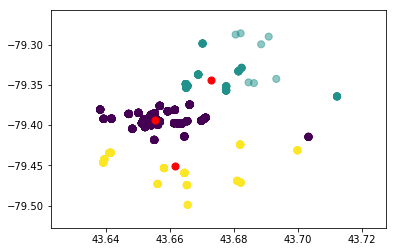

In [55]:
kmeans = KMeans(n_clusters=3).fit(newproduct)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(newproduct['location.lat'], newproduct['location.lng'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [56]:
newproduct.insert(2, 'Cluster Labels', kmeans.labels_)

In [57]:
newproduct

,location.lat,location.lng,Cluster Labels
0,43.680553,-79.287503,1
1,43.670200,-79.298618,1
2,43.682120,-79.285980,1
3,43.688526,-79.299600,1
4,43.690897,-79.290089,1
0,43.665067,-79.352298,1
1,43.677596,-79.351861,1
2,43.677570,-79.357010,1
3,43.684586,-79.346910,1
4,43.686277,-79.347757,1


In [58]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [61]:

# create map
map_clusters = folium.Map(location=[43.67, -79.4], zoom_start=11)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(newproduct['location.lat'], newproduct['location.lng'], newproduct['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

It seems that with only three clusters, there is a "West Toronto", a "North Toronto", and a "Downtown Toronto." This is very interesting, as East Toronto no longer exists and has merged into Downtown Toronto, and Central Toronto has been split between North Toronto and Downtown Toronto.